In [15]:
import warnings
warnings.filterwarnings("ignore")

[*********************100%%**********************]  1 of 1 completed

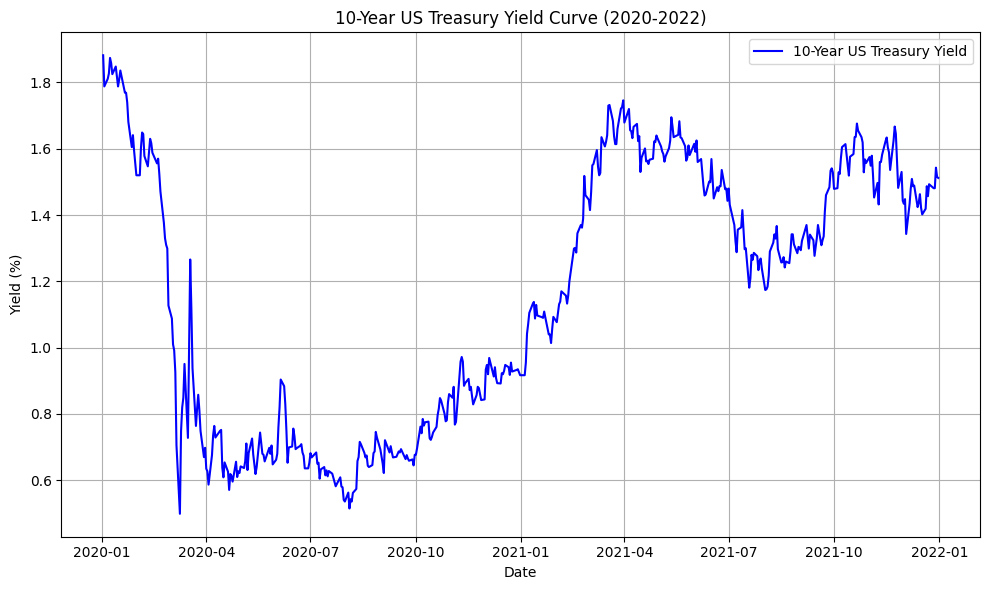

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for the US Treasury bond
ticker = '^TNX'  # 10-year US Treasury bond yield

# Fetch historical data from Yahoo Finance
data = yf.download(ticker, start="2020-01-01", end="2022-01-01")

# Extract the Date and Close (yield) columns
yield_data = data['Close']

# Plot the yield curve
plt.figure(figsize=(10, 6))
plt.plot(yield_data.index, yield_data.values, label='10-Year US Treasury Yield', color='blue')
plt.title('10-Year US Treasury Yield Curve (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
latest_yield = data['Close'].iloc[-1]

print("Latest 10-Year US Treasury Yield:", latest_yield, "%")

Latest 10-Year US Treasury Yield: 1.5119999647140503 %


[*********************100%%**********************]  10 of 10 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


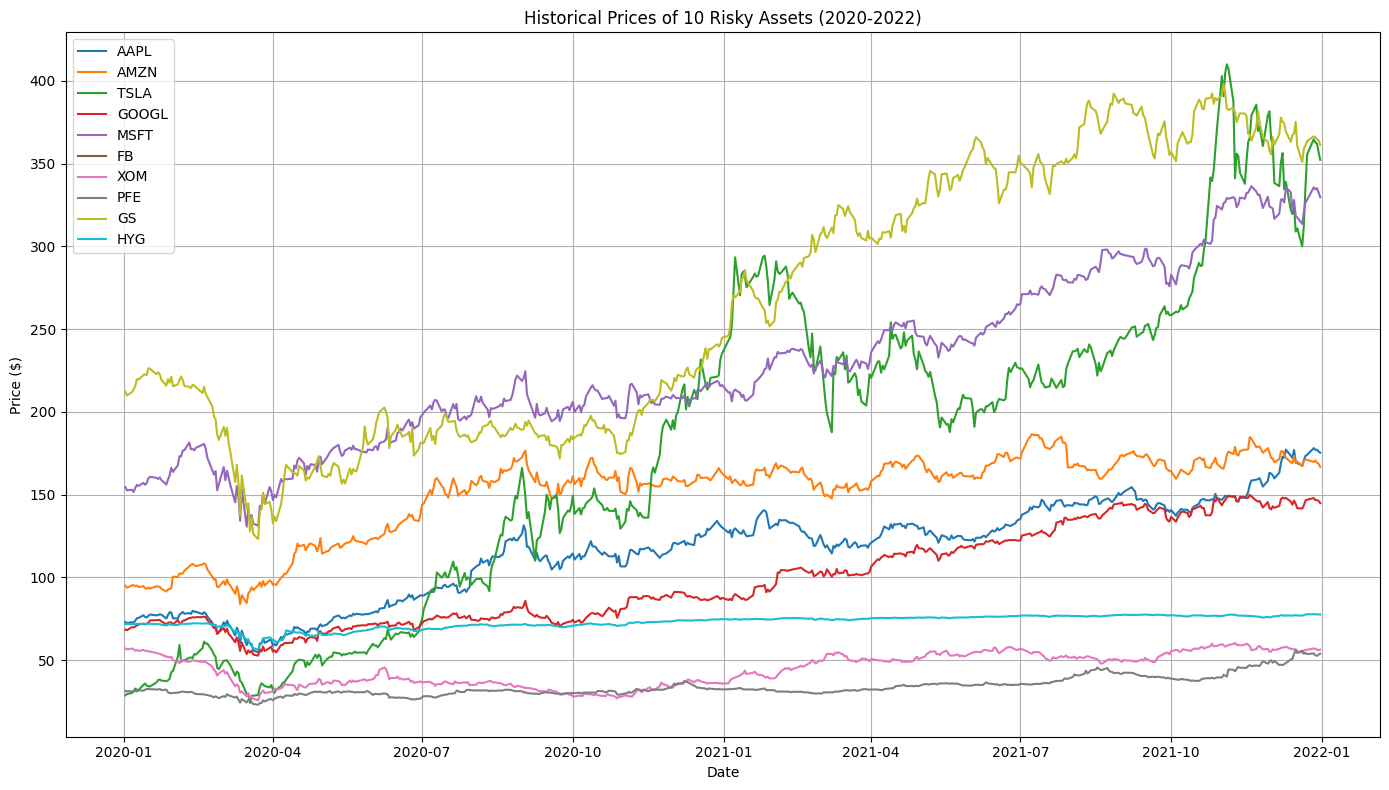

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols for the assets
ticker_symbols = ['AAPL', 'AMZN', 'TSLA', 'GOOGL', 'MSFT', 'FB', 'XOM', 'PFE', 'GS', 'HYG']

# Fetch historical data from Yahoo Finance
data = yf.download(ticker_symbols, start="2020-01-01", end="2022-01-01")['Adj Close']

# Plot the data for each asset
plt.figure(figsize=(14, 8))
for ticker_symbol in ticker_symbols:
    plt.plot(data.index, data[ticker_symbol], label=ticker_symbol)

plt.title('Historical Prices of 10 Risky Assets (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


Expected Returns (CAPM):
AAPL: 8.90%
AMZN: 6.35%
TSLA: 7.99%
GOOGL: 9.42%
MSFT: 4.31%
XOM: 8.77%
PFE: 5.58%
GS: 9.91%
HYG: 8.48%


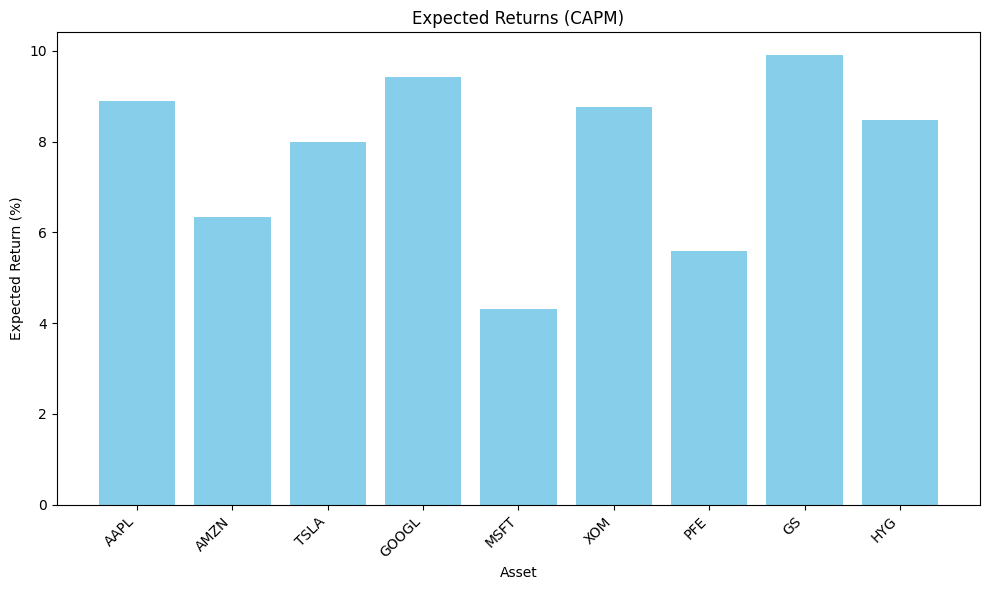

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")

# Define the ticker symbols for the assets
ticker_symbols = ['AAPL', 'AMZN', 'TSLA', 'GOOGL', 'MSFT', 'XOM', 'PFE', 'GS', 'HYG']

# Fetch historical price data from Yahoo Finance
data_assets = yf.download(ticker_symbols, start="2020-01-01", end="2022-01-01")['Adj Close']

# Check if data is available for assets
if data_assets.empty:
    print("Error: Insufficient data available for calculation")
else:
    # Calculate returns for assets
    returns_assets = data_assets.pct_change().dropna()

    # Check if there are sufficient returns data available for calculation
    if returns_assets.empty:
        print("Error: Insufficient returns data available for calculation")
    else:
        # Calculate covariance matrix and variance of the market returns
        data_market = yf.download('^GSPC', start="2020-01-01", end="2022-01-01")['Adj Close']
        if data_market.empty:
            print("Error: Insufficient data available for the market index (S&P 500)")
        else:
            returns_market = data_market.pct_change().dropna()
            covariance_matrix = np.cov(returns_assets.values.T, returns_market.values.T)
            market_variance = np.var(returns_market.values)

            # Calculate beta values
            beta_values = {}
            for i, ticker_symbol in enumerate(ticker_symbols):
                covariance = covariance_matrix[i][-1]
                variance = np.var(returns_assets[ticker_symbol].values)
                beta = covariance / market_variance
                beta_values[ticker_symbol] = beta

            # Risk-free rate (US 10-year Treasury bond yield as of February 21, 2024)
            R_f = 1.918  # % (current yield of US 10-year Treasury bond)

            # Expected market return (historical average, you can adjust this value)
            E_R_m = 8  # % (just an example, you can use historical market return)

            # Calculate the expected return for each asset using CAPM
            expected_returns_capm = {}
            for ticker_symbol, beta in beta_values.items():
                expected_return_capm = R_f + beta * (E_R_m - R_f)
                expected_returns_capm[ticker_symbol] = expected_return_capm

            # Print the expected return for each asset using CAPM
            print("Expected Returns (CAPM):")
            for ticker_symbol, expected_return_capm in expected_returns_capm.items():
                print(f"{ticker_symbol}: {expected_return_capm:.2f}%")

            # Plotting the expected returns
            plt.figure(figsize=(10, 6))
            plt.bar(expected_returns_capm.keys(), expected_returns_capm.values(), color='skyblue')
            plt.title('Expected Returns (CAPM)')
            plt.xlabel('Asset')
            plt.ylabel('Expected Return (%)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()


[                       0%%                      ]

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


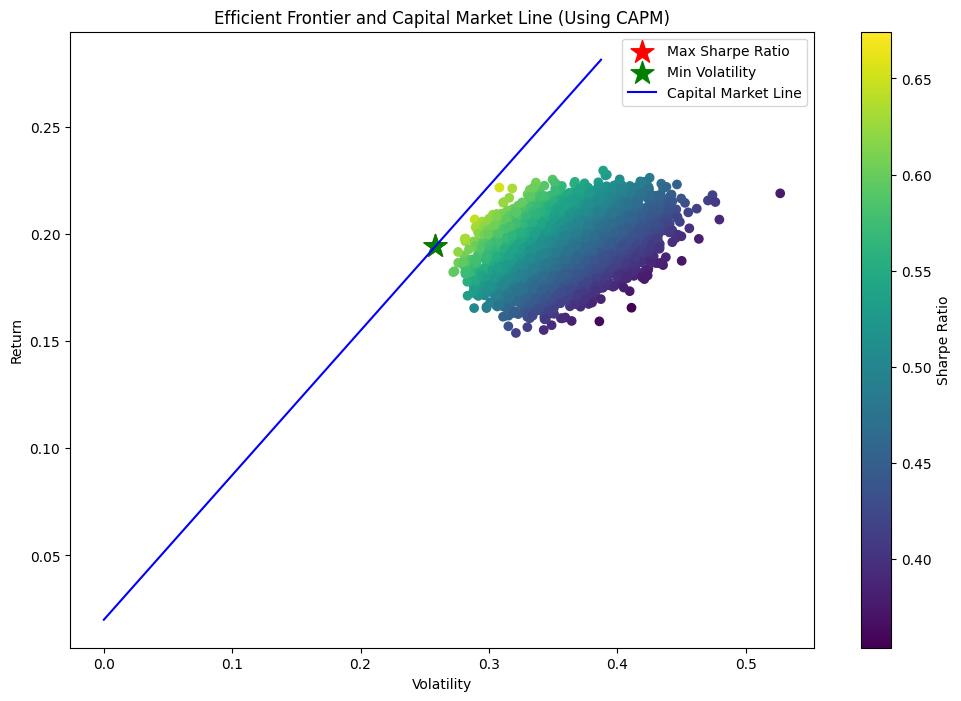

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  # You may need to install this package: pip install yfinance

# Define the ticker symbols
ticker_symbols = ['AAPL', 'AMZN', 'TSLA', 'GOOGL', 'MSFT', 'XOM', 'PFE', 'GS', 'HYG']

# Download historical price data
data = yf.download(ticker_symbols, start='2020-01-01', end='2021-01-01')['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Calculate market return (let's assume S&P 500 here)
market_data = yf.download('^GSPC', start='2020-01-01', end='2021-01-01')['Adj Close']
market_returns = market_data.pct_change().dropna()
market_return = market_returns.mean() * 252

# Calculate betas
betas = {}
for ticker in ticker_symbols:
    asset_data = yf.download(ticker, start='2020-01-01', end='2021-01-01')['Adj Close']
    asset_returns = asset_data.pct_change().dropna()
    cov_with_market = np.cov(asset_returns, market_returns)[0, 1]
    market_variance = np.var(market_returns)
    beta = cov_with_market / market_variance
    betas[ticker] = beta

# Risk-free rate (hypothetical for demonstration)
risk_free_rate = 0.02

# Number of portfolios to simulate
num_portfolios = 10000

# Initialize results arrays
results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(ticker_symbols))
    weights /= np.sum(weights)

    # Calculate portfolio beta
    portfolio_beta = np.sum([weights[j] * betas[ticker_symbols[j]] for j in range(len(ticker_symbols))])

    # Calculate portfolio return using CAPM
    portfolio_return = risk_free_rate + portfolio_beta * (market_return - risk_free_rate)

    # Store results
    results[0, i] = portfolio_return
    results[1, i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights))) * np.sqrt(252)  # Volatility
    # Sharpe ratio
    results[2, i] = (portfolio_return - risk_free_rate) / results[1, i]
    # Store weights
    results[3, i] = weights.mean()  # For plotting purposes

# Convert results array to DataFrame
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe', 'AvgWeight'])

# Find portfolios with maximum Sharpe ratio and minimum volatility
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe'].idxmax()]
min_volatility_portfolio = results_df.iloc[results_df['Volatility'].idxmin()]

# Plot efficient frontier and Capital Market Line
plt.figure(figsize=(12, 8))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis', marker='o')
plt.title('Efficient Frontier and Capital Market Line (Using CAPM)')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# Plot efficient frontier
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], marker='*', color='r', s=300, label='Max Sharpe Ratio')
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], marker='*', color='g', s=300, label='Min Volatility')

# Plot Capital Market Line
x_cml = np.linspace(0, max_sharpe_portfolio[1] * 1.5, 100)
y_cml = risk_free_rate + max_sharpe_portfolio[2] * x_cml
plt.plot(x_cml, y_cml, linestyle='-', color='b', label='Capital Market Line')

plt.legend()
plt.show()


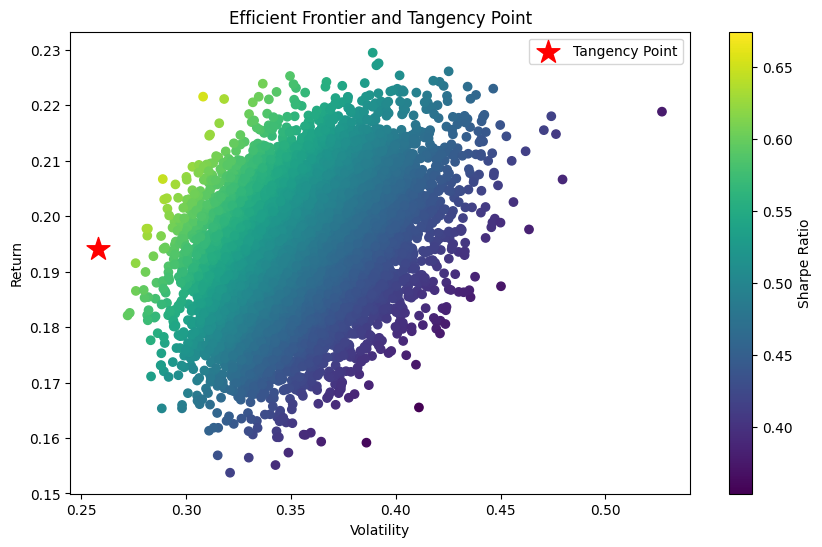

Tangency Point:
Return: 0.19411593039835565
Volatility: 0.25822618422385885
Sharpe Ratio: 0.6742768202290935
Weights: 0.1111111111111111


In [19]:
# Identify the tangency point on the efficient frontier where CML touches it

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe'].idxmax()]

# Plotting the tangency point separately
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis', marker='o')
plt.title('Efficient Frontier and Tangency Point')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# Plot the tangency point
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], marker='*', color='r', s=300, label='Tangency Point')

plt.legend()
plt.show()

# Print information about the tangency point
print("Tangency Point:")
print("Return:", max_sharpe_portfolio[0])
print("Volatility:", max_sharpe_portfolio[1])
print("Sharpe Ratio:", max_sharpe_portfolio[2])
print("Weights:", max_sharpe_portfolio[3])



 Maximum Sharpe Ratio: The tangency point corresponds to the portfolio with the maximum Sharpe ratio. The Sharpe ratio measures the excess return of a portfolio per unit of risk (volatility) taken. Therefore, the tangency portfolio achieves the highest risk-adjusted return among all possible portfolios on the efficient frontier.

Optimal Risk-Return Tradeoff: The tangency portfolio provides the best tradeoff between risk and return. It balances the desire for higher returns with the aversion to risk. By investing in the tangency portfolio, an investor maximizes their expected return for a given level of risk or minimizes their risk for a given level of return.

Efficient Diversification: The tangency portfolio represents the most efficient level of diversification achievable within the available set of assets. It combines assets in such a way that it minimizes portfolio risk while maximizing expected return. This optimal diversification helps to reduce portfolio volatility without sacrificing returns.

Foundation of Modern Portfolio Theory: The concept of the tangency portfolio is fundamental to Harry Markowitz's Modern Portfolio Theory. MPT suggests that investors can construct efficient portfolios by combining assets in proportions that maximize the Sharpe ratio. The tangency portfolio exemplifies this principle and serves as a cornerstone for portfolio construction and asset allocation decisions.

Benchmark for Investment Strategy: The tangency portfolio provides a benchmark for evaluating investment strategies. Investors can compare their portfolio allocations and performance against the tangency portfolio to assess whether they are achieving optimal risk-adjusted returns. Deviations from the tangency portfolio may indicate potential inefficiencies in portfolio construction.


c:\Users\vsama\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\vsama\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


The expected return for the risky asset AAPL using SML is: 0.1006439126549403


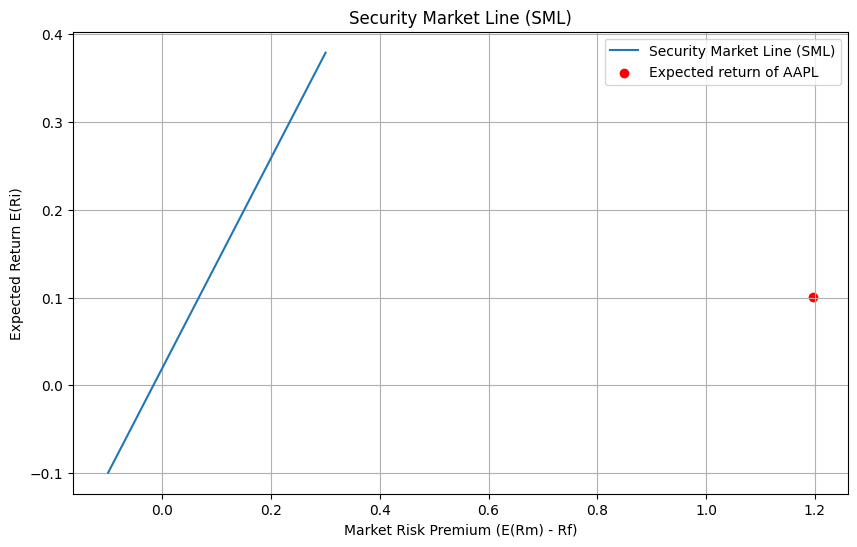

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Define the risky asset and the market benchmark symbols
risky_asset_symbol = 'AAPL'  # Replace AAPL with the stock symbol of interest
market_benchmark_symbol = '^GSPC'  # Standard & Poor's 500 Index
risk_free_rate = 0.02  # Risk-free rate (for example, return on U.S. Treasury Bonds)

# Define the time period for historical data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Retrieve historical data for the risky asset and the market benchmark
risky_asset_data = yf.download(risky_asset_symbol, start=start_date, end=end_date)['Adj Close']
market_benchmark_data = yf.download(market_benchmark_symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for the assets
risky_asset_returns = risky_asset_data.pct_change().dropna()
market_benchmark_returns = market_benchmark_data.pct_change().dropna()

# Calculate the beta for the risky asset
slope, intercept, r_value, p_value, std_err = stats.linregress(market_benchmark_returns, risky_asset_returns)
beta = slope

# Assume expected market return based on historical average or another method
expected_market_return = market_benchmark_returns.mean() * 252  # Annualize the mean return

# Now, use the SML equation to calculate the expected return for the risky asset
expected_return_risky_asset = risk_free_rate + beta * (expected_market_return - risk_free_rate)

print(f"The expected return for the risky asset {risky_asset_symbol} using SML is: {expected_return_risky_asset}")

# Plot the Security Market Line
market_premiums = np.linspace(-0.1, 0.3, 100)  # A range of market risk premiums
asset_returns = risk_free_rate + beta * market_premiums

plt.figure(figsize=(10, 6))
plt.plot(market_premiums, asset_returns, label='Security Market Line (SML)')
plt.scatter(beta, expected_return_risky_asset, color='red', label=f'Expected return of {risky_asset_symbol}')
plt.xlabel('Market Risk Premium (E(Rm) - Rf)')
plt.ylabel('Expected Return E(Ri)')
plt.title('Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\vsama\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\vsama\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


The expected return for the risky asset GOOGL using SML is: 0.09428670414726688


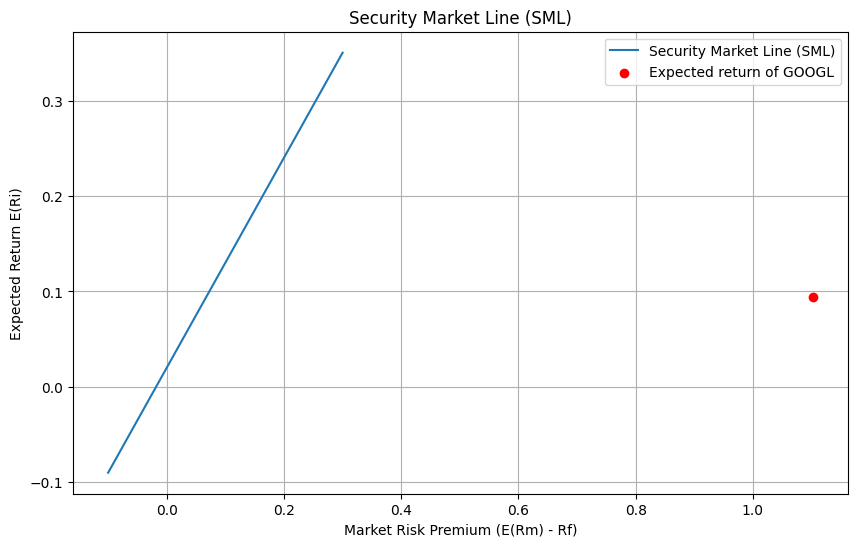

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Define the risky asset and the market benchmark symbols
risky_asset_symbol = 'GOOGL'  # Replace AAPL with the stock symbol of interest
market_benchmark_symbol = '^GSPC'  # Standard & Poor's 500 Index
risk_free_rate = 0.02  # Risk-free rate (for example, return on U.S. Treasury Bonds)

# Define the time period for historical data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Retrieve historical data for the risky asset and the market benchmark
risky_asset_data = yf.download(risky_asset_symbol, start=start_date, end=end_date)['Adj Close']
market_benchmark_data = yf.download(market_benchmark_symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for the assets
risky_asset_returns = risky_asset_data.pct_change().dropna()
market_benchmark_returns = market_benchmark_data.pct_change().dropna()

# Calculate the beta for the risky asset
slope, intercept, r_value, p_value, std_err = stats.linregress(market_benchmark_returns, risky_asset_returns)
beta = slope

# Assume expected market return based on historical average or another method
expected_market_return = market_benchmark_returns.mean() * 252  # Annualize the mean return

# Now, use the SML equation to calculate the expected return for the risky asset
expected_return_risky_asset = risk_free_rate + beta * (expected_market_return - risk_free_rate)

print(f"The expected return for the risky asset {risky_asset_symbol} using SML is: {expected_return_risky_asset}")

# Plot the Security Market Line
market_premiums = np.linspace(-0.1, 0.3, 100)  # A range of market risk premiums
asset_returns = risk_free_rate + beta * market_premiums

plt.figure(figsize=(10, 6))
plt.plot(market_premiums, asset_returns, label='Security Market Line (SML)')
plt.scatter(beta, expected_return_risky_asset, color='red', label=f'Expected return of {risky_asset_symbol}')
plt.xlabel('Market Risk Premium (E(Rm) - Rf)')
plt.ylabel('Expected Return E(Ri)')
plt.title('Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\vsama\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\vsama\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


The expected return for the risky asset MSFT using SML is: 0.09906218915151965


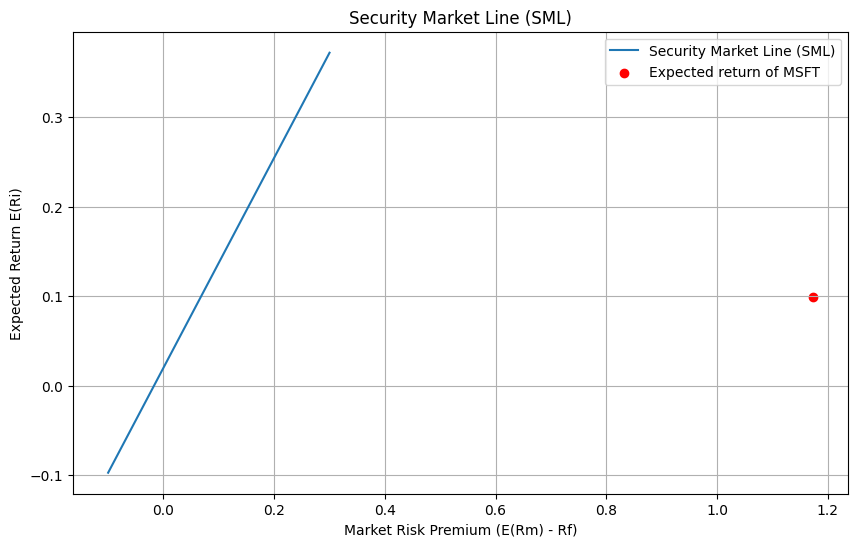

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Define the risky asset and the market benchmark symbols
risky_asset_symbol = 'MSFT'  # Replace AAPL with the stock symbol of interest
market_benchmark_symbol = '^GSPC'  # Standard & Poor's 500 Index
risk_free_rate = 0.02  # Risk-free rate (for example, return on U.S. Treasury Bonds)

# Define the time period for historical data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Retrieve historical data for the risky asset and the market benchmark
risky_asset_data = yf.download(risky_asset_symbol, start=start_date, end=end_date)['Adj Close']
market_benchmark_data = yf.download(market_benchmark_symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns for the assets
risky_asset_returns = risky_asset_data.pct_change().dropna()
market_benchmark_returns = market_benchmark_data.pct_change().dropna()

# Calculate the beta for the risky asset
slope, intercept, r_value, p_value, std_err = stats.linregress(market_benchmark_returns, risky_asset_returns)
beta = slope

# Assume expected market return based on historical average or another method
expected_market_return = market_benchmark_returns.mean() * 252  # Annualize the mean return

# Now, use the SML equation to calculate the expected return for the risky asset
expected_return_risky_asset = risk_free_rate + beta * (expected_market_return - risk_free_rate)

print(f"The expected return for the risky asset {risky_asset_symbol} using SML is: {expected_return_risky_asset}")

# Plot the Security Market Line
market_premiums = np.linspace(-0.1, 0.3, 100)  # A range of market risk premiums
asset_returns = risk_free_rate + beta * market_premiums

plt.figure(figsize=(10, 6))
plt.plot(market_premiums, asset_returns, label='Security Market Line (SML)')
plt.scatter(beta, expected_return_risky_asset, color='red', label=f'Expected return of {risky_asset_symbol}')
plt.xlabel('Market Risk Premium (E(Rm) - Rf)')
plt.ylabel('Expected Return E(Ri)')
plt.title('Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()
